## MODELADO CLASIFICACION NVICTIM_INTERV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Carga de los datos ya codificados categóricos

In [2]:
df_premodelo = pd.read_csv('./madrid_accidentes_modelar_NVICTIM_INTERV_v1_0.csv',encoding='latin1')

df_premodelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86817 entries, 0 to 86816
Data columns (total 23 columns):
MAL_TIEMPO                               86817 non-null int64
MAL_ESTADO_SUELO                         86817 non-null int64
num_vehic_implic                         86817 non-null int64
conductor_menor                          86817 non-null int64
conductor_18_34                          86817 non-null int64
conductor_35_49                          86817 non-null int64
conductor_50_mas                         86817 non-null int64
RANGO_HORARIO_DE 00:00 A 7:00            86817 non-null int64
RANGO_HORARIO_DE 12:00 A 17:00           86817 non-null int64
RANGO_HORARIO_DE 17:00 A 21:00           86817 non-null int64
RANGO_HORARIO_DE 21:00 A 00:00           86817 non-null int64
RANGO_HORARIO_DE 7:00 A 12:00            86817 non-null int64
DIA_SEMANA_FIN DE SEMANA                 86817 non-null int64
DIA_SEMANA_LABORABLE                     86817 non-null int64
TIPO_ACCIDENTE_ATROPELL

## SELECCION CARACTERISTICAS

Probaremos ranking importancia características y eliminación recursiva (RFE)

In [3]:
X = df_premodelo.drop(columns='NVICTIM_INTERV')

y = df_premodelo['NVICTIM_INTERV']

X.shape

(86817, 22)

### Importancia característica, modelo RF

In [4]:
from sklearn.ensemble import RandomForestClassifier

model_RF_ranking = RandomForestClassifier(n_estimators=500,random_state=42)

model_RF_ranking.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [5]:
ranking_RF = pd.Series(model_RF_ranking.feature_importances_,index=X.columns)

ranking_RF.sort_values(ascending=False)

num_vehic_implic                         0.213344
TIPO_ACCIDENTE_COLISION MULTIPLE         0.119474
conductor_18_34                          0.087695
conductor_35_49                          0.081014
TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS    0.068596
conductor_50_mas                         0.064594
TIPO_ACCIDENTE_COLISION DOBLE            0.052645
RANGO_HORARIO_DE 00:00 A 7:00            0.044811
MAL_ESTADO_SUELO                         0.035470
MAL_TIEMPO                               0.034006
TIPO_ACCIDENTE_ATROPELLO                 0.025405
RANGO_HORARIO_DE 7:00 A 12:00            0.021158
DIA_SEMANA_FIN DE SEMANA                 0.019492
RANGO_HORARIO_DE 12:00 A 17:00           0.018086
DIA_SEMANA_LABORABLE                     0.018073
TIPO_ACCIDENTE_CAIDA BICICLETA           0.017980
RANGO_HORARIO_DE 17:00 A 21:00           0.017827
RANGO_HORARIO_DE 21:00 A 00:00           0.016384
TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO    0.016109
conductor_menor                          0.013364


### RFE  (ELIMINACION RECURSIVA)

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [7]:

model_RFE = RandomForestClassifier(random_state=42)
rfe = RFE(model_RFE, 8)

fit_RFE = rfe.fit(X, y)


In [8]:
ranking_RFE = pd.Series(X.columns.values, index=fit_RFE.ranking_)

ranking_RFE.sort_index()

1                          num_vehic_implic
1             TIPO_ACCIDENTE_COLISION DOBLE
1                           conductor_18_34
1                           conductor_35_49
1             RANGO_HORARIO_DE 00:00 A 7:00
1     TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS
1          TIPO_ACCIDENTE_COLISION MULTIPLE
1                  DIA_SEMANA_FIN DE SEMANA
2                          conductor_50_mas
3                  TIPO_ACCIDENTE_ATROPELLO
4             RANGO_HORARIO_DE 7:00 A 12:00
5                          MAL_ESTADO_SUELO
6                                MAL_TIEMPO
7            RANGO_HORARIO_DE 17:00 A 21:00
8            RANGO_HORARIO_DE 12:00 A 17:00
9            TIPO_ACCIDENTE_CAIDA BICICLETA
10    TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO
11                     DIA_SEMANA_LABORABLE
12           RANGO_HORARIO_DE 21:00 A 00:00
13                          conductor_menor
14              TIPO_ACCIDENTE_VUELCO_OTROS
15         TIPO_ACCIDENTE_CAIDA VIAJERO BUS
dtype: object

### Tabla resumen seleccion caracteristicas.

In [9]:
tabla_ranking = pd.DataFrame({'RF_importance': ranking_RF.sort_values(ascending=False).index, \
                             'orden_RFE': ranking_RFE.sort_index().index, 'atributo_RFE': ranking_RFE.sort_index().values})

tabla_ranking

,RF_importance,orden_RFE,atributo_RFE
0,num_vehic_implic,1,num_vehic_implic
1,TIPO_ACCIDENTE_COLISION MULTIPLE,1,TIPO_ACCIDENTE_COLISION DOBLE
2,conductor_18_34,1,conductor_18_34
3,conductor_35_49,1,conductor_35_49
4,TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS,1,RANGO_HORARIO_DE 00:00 A 7:00
5,conductor_50_mas,1,TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS
6,TIPO_ACCIDENTE_COLISION DOBLE,1,TIPO_ACCIDENTE_COLISION MULTIPLE
7,RANGO_HORARIO_DE 00:00 A 7:00,1,DIA_SEMANA_FIN DE SEMANA
8,MAL_ESTADO_SUELO,2,conductor_50_mas
9,MAL_TIEMPO,3,TIPO_ACCIDENTE_ATROPELLO


Nos quedamos con las de RFE, eliminamos las descartadas.

In [10]:
X.drop(columns=['RANGO_HORARIO_DE 12:00 A 17:00','RANGO_HORARIO_DE 17:00 A 21:00','RANGO_HORARIO_DE 7:00 A 12:00', \
                'TIPO_ACCIDENTE_CAIDA BICICLETA','TIPO_ACCIDENTE_ATROPELLO','conductor_50_mas', \
                'MAL_ESTADO_SUELO','MAL_TIEMPO', \
                'TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO','DIA_SEMANA_LABORABLE','RANGO_HORARIO_DE 21:00 A 00:00', \
                'conductor_menor','TIPO_ACCIDENTE_VUELCO_OTROS','TIPO_ACCIDENTE_CAIDA VIAJERO BUS'], inplace=True)

X.shape

(86817, 8)

In [11]:
X.columns

Index(['num_vehic_implic', 'conductor_18_34', 'conductor_35_49',
       'RANGO_HORARIO_DE 00:00 A 7:00', 'DIA_SEMANA_FIN DE SEMANA',
       'TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS',
       'TIPO_ACCIDENTE_COLISION DOBLE', 'TIPO_ACCIDENTE_COLISION MULTIPLE'],
      dtype='object')

### SEPARACIÓN CONJUNTOS TRAIN Y TEST ESTRATIFICADO

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in train_test_split.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    
    y_train, y_test = y[train_index], y[test_index]

In [13]:
y_train.value_counts(normalize=True)

LEVE           0.804561
MEDIA/GRAVE    0.195439
Name: NVICTIM_INTERV, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

LEVE           0.804538
MEDIA/GRAVE    0.195462
Name: NVICTIM_INTERV, dtype: float64

### PRUEBA DE DISTINTOS MODELOS (Ensembles) con datos originales, sin aplicar resampling.

### acciones comunes a todos los modelos

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score 

# la division de los K-folds para la validación cruzada también estratificada, dado el desequiibrio en la target
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds)

# designamos métrica para evaluación AUC
scoring = 'roc_auc'


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

n_trees = 100
modelo_RF = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, random_state=42)

resultadosRF = cross_val_score(modelo_RF, X_train, y_train, cv=skf, scoring=scoring)

print('Random Forest:\n')
print('Media:',resultadosRF.mean(),' Desviación:',resultadosRF.std())


Random Forest:

Media: 0.6803587341368733  Desviación: 0.004965049316342862


In [17]:

modelo_RF.fit(X_train, y_train)

y_preds = modelo_RF.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report Random Forest: \n', report)


Classification Report Random Forest: 
               precision    recall  f1-score   support

        LEVE       0.81      0.99      0.89     20955
 MEDIA/GRAVE       0.52      0.06      0.11      5091

    accuracy                           0.81     26046
   macro avg       0.67      0.52      0.50     26046
weighted avg       0.75      0.81      0.74     26046



Fila MODERADA/GRAVE, valor de recall muy pequeño supone que el número de FN (MEDIA/GRAVE), la minoritaria, clasificada como LEVE , la mayoritaria) supera en mucho a los bien clasificados como MODERADA/GRAVE (TP).

Vemos el problema de detección de la clase minoritaria debido al desequilibrio entre las clases.

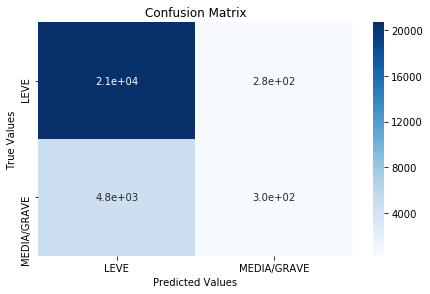

In [18]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

Podemos comprobar en la matriz de confusión como habíamos comentado que el número de MODERADA/GRAVE mal clasificado como leve supera al buen clasificado.

### AdaBoost Classifier.

In [20]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
modelo_AdaBoost = AdaBoostClassifier(n_estimators=num_trees, random_state=42)

resultadosAdaB = cross_val_score(modelo_AdaBoost, X_train, y_train, cv=skf, scoring=scoring)

print('AdaBoost:\n')
print('Media:',resultadosAdaB.mean(),' Desviación:',resultadosAdaB.std())



AdaBoost:

Media: 0.6811175922928964  Desviación: 0.004541866449306758


De nuevo valor muy bajo, examinemos informe de clasificacion y matriz de confusion.

In [21]:

modelo_AdaBoost.fit(X_train, y_train)

y_preds = modelo_AdaBoost.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report AdaBoost Classifier: \n', report)


Classification Report AdaBoost Classifier: 
               precision    recall  f1-score   support

        LEVE       0.81      0.99      0.89     20955
 MEDIA/GRAVE       0.55      0.05      0.10      5091

    accuracy                           0.81     26046
   macro avg       0.68      0.52      0.49     26046
weighted avg       0.76      0.81      0.74     26046



De nuevo valor muy bajo de recall para la clase minoritaria MEDIA/GRAVE, los valores mal clasificados de esa clase (FN) superan bastante a los bien clasificados (TP). Veamos la matriz de confusión.

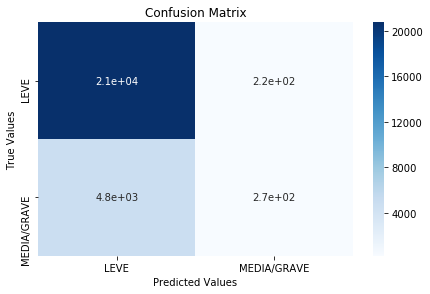

In [22]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

Donde vemos que de hecho los supera en un orden de magnitud.

## IMBALANCED LEARNING: casos de clasificación con el número de observaciones por clase desequilibrado

Explicar que los malos resultados se deben al target desbalanceado, cuesta detectar el minoritario y que es necesario tecnicads de resampling

#### SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

X_train_rsmpl, y_train_rsmpl = smote.fit_sample(X_train, y_train)

X_train_rsmpl.shape, y_train_rsmpl.shape

((97788, 8), (97788,))

In [25]:
# TARGET ORIGINAL, Nº OBSERVACIONES DE CADA CLASE
y_train.value_counts()

LEVE           48894
MEDIA/GRAVE    11877
Name: NVICTIM_INTERV, dtype: int64

In [26]:
# TARGET APLICADO OVERSAMPLING (SMOTE)
y_train_rsmpl.value_counts()

LEVE           48894
MEDIA/GRAVE    48894
Name: NVICTIM_INTERV, dtype: int64

## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

modelo_GNBy = GaussianNB()

resultadosGNBy = cross_val_score(modelo_GNBy, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('Naive Bayes:\n')
print('Media:',resultadosGNBy.mean(),' Desviación:',resultadosGNBy.std())



Naive Bayes:

Media: 0.675185820013523  Desviación: 0.00420255856551884


In [28]:

modelo_GNBy.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_GNBy.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report NAIVE BAYES: \n', report)


Classification Report NAIVE BAYES: 
               precision    recall  f1-score   support

        LEVE       0.86      0.65      0.74     20955
 MEDIA/GRAVE       0.29      0.57      0.38      5091

    accuracy                           0.64     26046
   macro avg       0.57      0.61      0.56     26046
weighted avg       0.75      0.64      0.67     26046



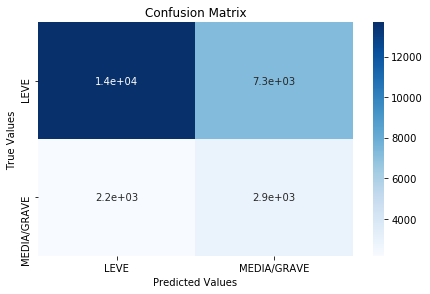

In [29]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

In [30]:
print(f1_score(y_test,y_preds,pos_label='MEDIA/GRAVE'))


0.3822740066767035


## Linear Discriminant Analisis (LDA)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

modelo_LDA = LinearDiscriminantAnalysis()

resultadosLDA = cross_val_score(modelo_LDA, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('LDA:\n')
print('Media:',resultadosLDA.mean(),' Desviación:',resultadosLDA.std())



LDA:

Media: 0.6812023162536749  Desviación: 0.004473889677103071


In [32]:

modelo_LDA.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_LDA.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report LDA: \n', report)


Classification Report LDA: 
               precision    recall  f1-score   support

        LEVE       0.88      0.53      0.67     20955
 MEDIA/GRAVE       0.27      0.71      0.39      5091

    accuracy                           0.57     26046
   macro avg       0.58      0.62      0.53     26046
weighted avg       0.76      0.57      0.61     26046



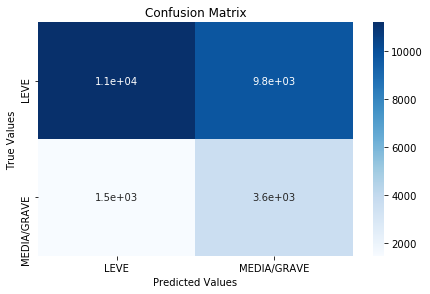

In [33]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier

modelo_DesTree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

resultadosDesTree = cross_val_score(modelo_DesTree, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('DECISION TREE:\n')
print('Media:',resultadosDesTree.mean(),' Desviación:',resultadosDesTree.std())



DECISION TREE:

Media: 0.6870723593843933  Desviación: 0.004465214307163591


In [36]:

modelo_DesTree.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_DesTree.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report LOGISTIC REGRESSION: \n', report)


Classification Report LOGISTIC REGRESSION: 
               precision    recall  f1-score   support

        LEVE       0.88      0.57      0.69     20955
 MEDIA/GRAVE       0.28      0.68      0.39      5091

    accuracy                           0.59     26046
   macro avg       0.58      0.62      0.54     26046
weighted avg       0.76      0.59      0.63     26046



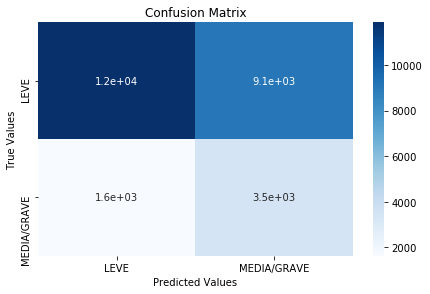

In [37]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

modelo_LGR = LogisticRegression(solver='lbfgs', max_iter=250, random_state=42,n_jobs=-1)

resultadosLRG = cross_val_score(modelo_LGR, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('LOGISTIC REGRESSION:\n')
print('Media:',resultadosLRG.mean(),' Desviación:',resultadosLRG.std())



LOGISTIC REGRESSION:

Media: 0.6811914158439605  Desviación: 0.00454554902407839


In [40]:

modelo_LGR.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_AdaBoost.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report LOGISTIC REGRESSION: \n', report)


Classification Report LOGISTIC REGRESSION: 
               precision    recall  f1-score   support

        LEVE       0.81      0.99      0.89     20955
 MEDIA/GRAVE       0.55      0.05      0.10      5091

    accuracy                           0.81     26046
   macro avg       0.68      0.52      0.49     26046
weighted avg       0.76      0.81      0.74     26046



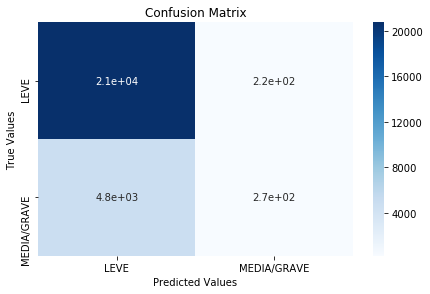

In [41]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## Random Forest

In [43]:
n_trees = 300
modelo_RF = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, random_state=42, class_weight='balanced')

resultadosRF = cross_val_score(modelo_RF, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('Random Forest:\n')
print('Media:',resultadosRF.mean(),' Desviación:',resultadosRF.std())


Random Forest:

Media: 0.6872094415053679  Desviación: 0.004315676133389773


In [44]:

modelo_RF.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_RF.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report Random Forest: \n', report)


Classification Report Random Forest: 
               precision    recall  f1-score   support

        LEVE       0.88      0.57      0.69     20955
 MEDIA/GRAVE       0.28      0.68      0.39      5091

    accuracy                           0.59     26046
   macro avg       0.58      0.62      0.54     26046
weighted avg       0.76      0.59      0.63     26046



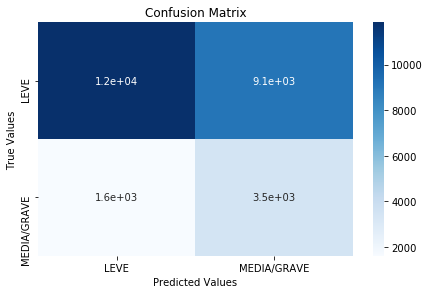

In [45]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## AdaBoost Classifier.

In [48]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 300
modelo_AdaBoost = AdaBoostClassifier(n_estimators=num_trees, random_state=42)

resultadosAdaB = cross_val_score(modelo_AdaBoost, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('AdaBoost:\n')
print('Media:',resultadosAdaB.mean(),' Desviación:',resultadosAdaB.std())



AdaBoost:

Media: 0.6808975038209638  Desviación: 0.00455532134093779


In [49]:

modelo_AdaBoost.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_AdaBoost.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report AdaBoost Classifier: \n', report)


Classification Report AdaBoost Classifier: 
               precision    recall  f1-score   support

        LEVE       0.88      0.53      0.67     20955
 MEDIA/GRAVE       0.27      0.71      0.39      5091

    accuracy                           0.57     26046
   macro avg       0.58      0.62      0.53     26046
weighted avg       0.76      0.57      0.61     26046



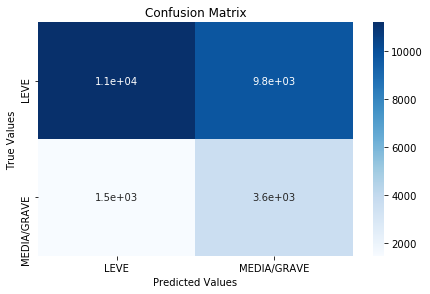

In [50]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 300
modelo_GBC = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)

resultadosGBC = cross_val_score(modelo_GBC, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('GRADIENT BOOST CLASSIFIER:\n')
print('Media:',resultadosGBC.mean(),' Desviación:',resultadosGBC.std())



GRADIENT BOOST CLASSIFIER:

Media: 0.6856720727976323  Desviación: 0.004344822770866324


De nuevo valor muy bajo, examinemos informe de clasificacion y matriz de confusion.

In [53]:

modelo_GBC.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_GBC.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report GRADIENT BOOST CLASSIFIER: \n', report)


Classification Report GRADIENT BOOST CLASSIFIER: 
               precision    recall  f1-score   support

        LEVE       0.88      0.59      0.71     20955
 MEDIA/GRAVE       0.28      0.67      0.40      5091

    accuracy                           0.60     26046
   macro avg       0.58      0.63      0.55     26046
weighted avg       0.76      0.60      0.64     26046



De nuevo valor muy bajo de recall para la clase minoritaria MODERADA/GRAVE, los valores mal clasificados de esa clase (FN) superan bastante a los bien clasificados (TP). Veamos la matriz de confusión.

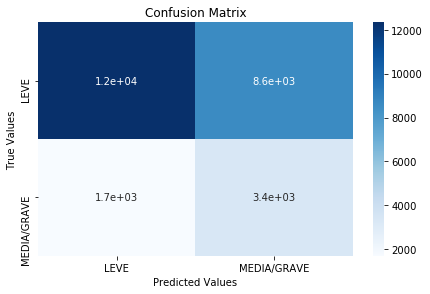

In [54]:
# create confusion matrix
mat_conf = confusion_matrix(y_test, y_preds)

# create dataframe
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

Dados los valores AUC (roc_auc) de las validaciones cruzadas y examinando también los informes de clasificación y la matriz de confusión nos quedamos con RF, GradientBosstClassification y Decission Tree.